# **Genetic Algorithm - EUR Optimization**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Shale Gas Wells.csv to Shale Gas Wells.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
#Import the data set
dataset=pd.read_csv('Shale Gas Wells.csv')
X=dataset.iloc[:,0:13]
y=dataset.iloc[:,13].values
# Fix the seed number for splitting the data into training and testing
seed=15
np.random.seed(seed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, 
test_size=0.25)
#Specifying the neural network topology with MLPRegressor including 2
#hidden layers
global modelNN
modelNN=make_pipeline(MinMaxScaler(),
MLPRegressor(hidden_layer_sizes=(25,25),learning_rate_init=0.01,
early_stopping=True,max_iter=500))
#Training the model 
modelNN.fit(X_train, y_train)
print("Test R2 score: {:.2f}".format(modelNN.score(X_test,
y_test)))

Test R2 score: 0.79


In [4]:
!pip install geneticalgorithm

     |████████████████████████████████| 44 kB 1.5 MB/s 
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15098 sha256=4e8ef64345c814437f4e14018080ea8a4f02fda24b67ef74d6becece1d8fa9a2
  Stored in directory: /root/.cache/pip/wheels/68/b5/a5/67c4364c354e141f5a1bd3ec568126f77877ab7554cf5af8cb
Successfully built func-timeout


In [5]:
from geneticalgorithm import geneticalgorithm as ga
def f(X):
# Reshape the column vector X to a row vector X_Row
    X_Row=X.reshape(1,-1)
# Return negative value for since GA minimizes the objective function
    return -1*modelNN.predict(X_Row)
#Lateral Length (4,500 ft to 11,500 ft) and Proppant loading (1100#/ft
#to 3200#/ft). The rest of the attributes should be equal to average.
#Dip attribute should be zero.
varbound=np.array([[0.0,0.0]]*13)
avg_vals=X.mean(axis=0)
varbound[:,0]=avg_vals; varbound[:,1]=avg_vals
varbound[5,0] =4500
varbound[5,1]=11500
varbound[3,0]=0
varbound[3,1]=0
varbound[12,0]=1100
varbound[12,1]=3200

In [6]:
algorithm_param={'max_num_iteration': None, 'population_size':100,
'mutation_probability':0.1,'elit_ratio': 0.1,
'crossover_probability': 0.5,'parents_portion': 0.2,
'crossover_type':'uniform','max_iteration_without_improv':100}
model=ga(function=f,dimension=13,variable_type='real',
variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()
convergence=model.report
solution=model.output_dict

Output hidden; open in https://colab.research.google.com to view.

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted wit

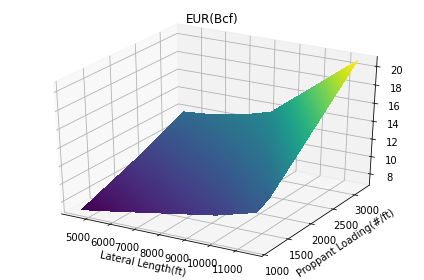

In [7]:
n=100
m=50
# linspace returns n and m equally spaced values over the interval
#passed to it
x_vals=np.linspace(4500,11500,n+1)
y_vals=np.linspace(1100,3200,m+1)
# meshgrid returns the coordinate matrices by combining all the
#combinations of x_vals and y_vals and creates an n*m x and y spaces
x,y=np.meshgrid(x_vals, y_vals)
z=np.zeros_like(x)
item=np.array([0.0]*13)
item [:]=avg_vals
for i in range(m+1):
    for j in range(n+1):
        item[3]=0
        item[5]=x[i,j]
        item[12]=y[i,j]
        z[i,j]=-1 *f(item)
fig=plt.figure()
#adding 3d projection for the plot
ax0=plt.axes(projection='3d')
surf=ax0.plot_surface(x, y, z, rstride=1, cstride=1,
cmap='viridis', linewidth=0, antialiased=False)
ax0.set_xlabel('Lateral Length(ft)')
ax0.set_ylabel('Proppant Loading(#/ft)')
ax0.set_title('EUR(Bcf)')
plt.tight_layout()